In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. For given Dataset, perform classification using a Single layer Neural Network

In [2]:
df = pd.read_csv("citrus.csv")
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [3]:
from sklearn import preprocessing

In [4]:
le  = preprocessing.LabelEncoder()

In [5]:
df['name'] = le.fit_transform(df['name'])

In [6]:
df

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
singleLayer_single_node = MLPClassifier(hidden_layer_sizes=(1,))

In [9]:
singleLayer = MLPClassifier(hidden_layer_sizes=(10,))

In [10]:

# help(MLPClassifier)

In [11]:
X = df.drop(['name'] , axis = 1)
y = df['name']

Text(0.5, 1.0, 'Boxplot for diameter')

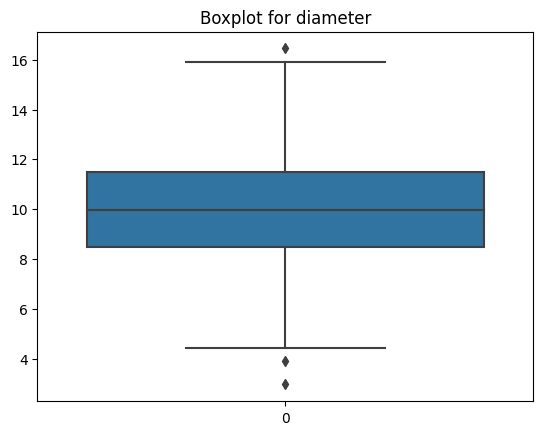

In [12]:
sns.boxplot(data = X['diameter'])
plt.title('Boxplot for diameter')


In [13]:
q1=df['diameter'].quantile(0.25)
q3=df['diameter'].quantile(0.75)
print("q1 = ",q1 ,"q3 = ", q3)
iqr=q3-q1
print("iqr = ",iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("li = ",ll,"ul = ",ul)
df=df[~((df['diameter']<ll) | (df['diameter']>ul))]
df.shape

q1 =  8.46 q3 =  11.48
iqr =  3.0199999999999996
li =  3.9300000000000015 ul =  16.009999999999998


(9997, 6)

Text(0.5, 1.0, 'Boxplot for weight')

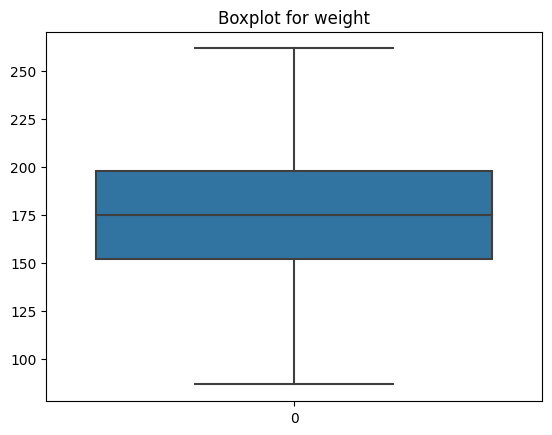

In [14]:
sns.boxplot(data = X['weight'])
plt.title('Boxplot for weight')

Text(0.5, 1.0, 'Boxplot for red')

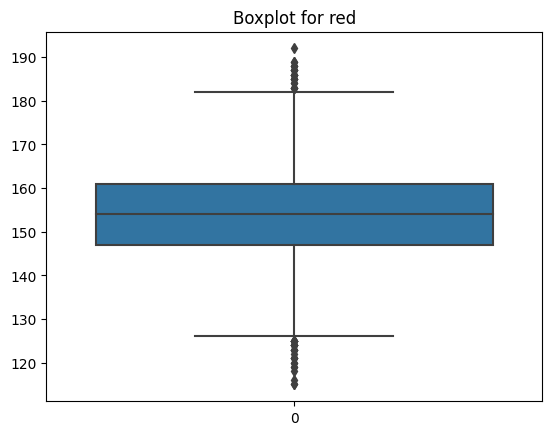

In [15]:
sns.boxplot(data = X['red'])
plt.title('Boxplot for red')

In [16]:
q1=df['red'].quantile(0.25)
q3=df['red'].quantile(0.75)
print("q1 = ",q1 ,"q3 = ", q3)
iqr=q3-q1
print("iqr = ",iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("li = ",ll,"ul = ",ul)
df=df[~((df['red']<ll) | (df['red']>ul))]
df.shape

q1 =  147.0 q3 =  161.0
iqr =  14.0
li =  126.0 ul =  182.0


(9942, 6)

Text(0.5, 1.0, 'Boxplot for green')

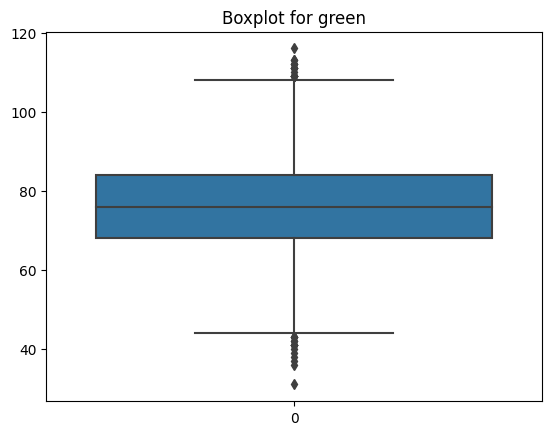

In [17]:
sns.boxplot(data = X['green'])
plt.title('Boxplot for green')

In [18]:
q1=df['green'].quantile(0.25)
q3=df['green'].quantile(0.75)
print("q1 = ",q1 ,"q3 = ", q3)
iqr=q3-q1
print("iqr = ",iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("li = ",ll,"ul = ",ul)
df=df[~((df['green']<ll) | (df['green']>ul))]
df.shape

q1 =  68.0 q3 =  84.0
iqr =  16.0
li =  44.0 ul =  108.0


(9904, 6)

Text(0.5, 1.0, 'Boxplot for blue')

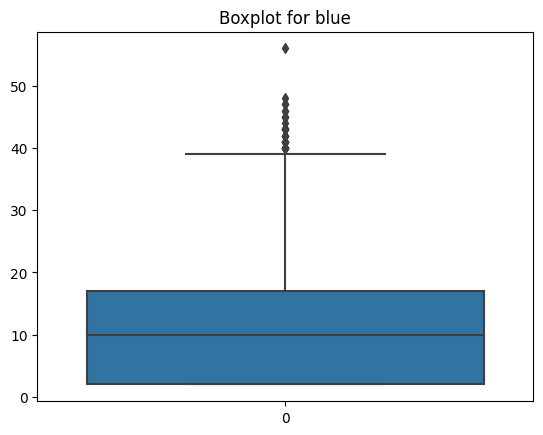

In [19]:
sns.boxplot(data = X['blue'])
plt.title('Boxplot for blue')

In [20]:
q1=df['blue'].quantile(0.25)
q3=df['blue'].quantile(0.75)
print("q1 = ",q1 ,"q3 = ", q3)
iqr=q3-q1
print("iqr = ",iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("li = ",ll,"ul = ",ul)
df=df[~((df['blue']<ll) | (df['blue']>ul))]
df.shape

q1 =  2.0 q3 =  17.0
iqr =  15.0
li =  -20.5 ul =  39.5


(9868, 6)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42 , stratify=y)

In [22]:
singleLayer_single_node.fit(X_train,y_train)

c:\users\nihar\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(1,))

In [23]:
singleLayer.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,))

In [24]:
predict_single_node = singleLayer_single_node.predict(X_test)

In [25]:
predict = singleLayer.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score


In [27]:
accuracy_score(y_test , predict_single_node)

0.9245

In [28]:
accuracy_score(y_test, predict)

0.9235

### Neural Network(using  multiple  layers)for Binary Classification

In [29]:
multilayer = MLPClassifier(hidden_layer_sizes=(10,7))

In [30]:
multilayer.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 7))

In [31]:
predict = multilayer.predict(X_test)

In [32]:
accuracy_score(y_test, predict)

0.931

In [33]:

output = {"modal" : [],"accuracy" : []}
node_in_layer = [10,7,5,3,2]
for i in range(len(node_in_layer)):
    mlp = MLPClassifier(hidden_layer_sizes=tuple(node_in_layer[0:i+1]))
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    output["modal"].append(i)
    output["accuracy"].append(accuracy_score(y_test, predict))


c:\users\nihar\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
outputDataframe = pd.DataFrame(output)

In [35]:
outputDataframe

,modal,accuracy
0,0,0.9275
1,1,0.9295
2,2,0.9255
3,3,0.9250
4,4,0.9285


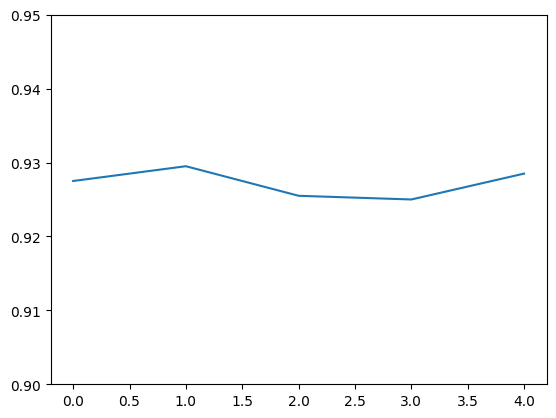

In [38]:
plt.ylim([0.9,.95])
plt.plot(outputDataframe["modal"] , outputDataframe["accuracy"])

As we can see from the graph that the accuracy of our model is around 0.92, on average, even as we increase the number of layers.
This is specific only for this dataset and the structure of MLP used.

Usually, increasing the number of layers increases the accuracy up till a certain point, after which there might be no effect on accuracy wrt the number of layers.